# Pump it Up

*Please note that we expect
to see a comparison of multiple approaches to solving the issue from different partners in the team.*

Competition Link Here

amount_tsh - Total static head (amount water available to waterpoint): the amount of water the pump can push or provide, measured in height (meters). It's a way to gauge the water capacity or pressure the pump can handle or is dealing with.
date_recorded - The date the row was entered
funder - Who funded the well
gps_height - Altitude of the well
installer - Organization that installed the well
longitude - GPS coordinate
latitude - GPS coordinate
wpt_name - Name of the waterpoint if there is one
num_private -
basin - Geographic water basin
subvillage - Geographic location
region - Geographic location
region_code - Geographic location (coded)
district_code - Geographic location (coded)
lga - Geographic location
ward - Geographic location
population - Population around the well
public_meeting - True/False, whether a public meeting about this water pump has taken place?
recorded_by - Group entering this row of data
scheme_management - Who operates the waterpoint
scheme_name - Who operates the waterpoint
permit - If the waterpoint is permitted
construction_year - Year the waterpoint was constructed
extraction_type - The kind of extraction the waterpoint uses
extraction_type_group - The kind of extraction the waterpoint uses
extraction_type_class - The kind of extraction the waterpoint uses
management - How the waterpoint is managed
management_group - How the waterpoint is managed
payment - What the water costs
payment_type - What the water costs
water_quality - The quality of the water
quality_group - The quality of the water
quantity - The quantity of water
quantity_group - The quantity of water
source - The source of the water
source_type - The source of the water
source_class - The source of the water
waterpoint_type - The kind of waterpoint
waterpoint_type_group - The kind of waterpoint

Imputation Progress

## Import Data & Data Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MultipleLocator
!pip install miceforest
from miceforest import ImputationKernel


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Adding Data

In [ ]:
#Reading main Dataset
df_data = pd.read_csv('Pump.csv')

#Reading Dataset of pumps
df_working = pd.read_csv('pumps_working.csv')

#Inner Merging these two datasets
df = pd.merge(df_data, df_working, on='id', how='inner') 
df.rename(columns={'status_group': 'functional'}, inplace=True)

coursework_progress = coursework_progress = pd.DataFrame({
    'Column Names': df.columns.tolist(), 
    "Taken Care Of": False, 
    "Imputation Techniques Tried": [[] for _ in df.columns],  
    "Imputation Technique Used": [None for _ in df.columns] 
})
imputed_df = pd.DataFrame()

def log_imputation(column_name: str, technique: str, final: bool):
    index = coursework_progress['Column Names'].tolist().index(column_name)
    coursework_progress.at[index, "Imputation Techniques Tried"].append(technique)
    if final:
        coursework_progress.at[index, "Taken Care Of"] = True
        coursework_progress.at[index, "Imputation Technique Used"] = technique


In [ ]:
#Worth Replacing 0s with nan
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,functional
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
#Helper function
def check_impute_difference (feature, original_dataset, current_dataframe):
  original_dataset[feature].plot(kind='kde', )
  current_dataframe[feature].plot(kind='kde', style = "--")
  labels = ['Original Dataset', 'Current Dataframe']
  plt.legend(labels)
  plt.xlabel(feature)
  plt.show()

## Sorting out Null Values

Many columns have rows who's values are null, but that Pandas does not recognise as these are not properly labelled (0 population for example is likely a NaN value)

In [ ]:
#Globally replace NaN strings
df.replace(inplace=True, to_replace='nan', value=np.nan)
df.replace(inplace=True, to_replace='NaN', value=np.nan)
df.replace(inplace=True, to_replace='NAN', value=np.nan)
df.replace(inplace=True, to_replace='nAn', value=np.nan)
df.replace(inplace=True, to_replace='Nan', value=np.nan)
df.replace(inplace=True, to_replace='naN', value=np.nan)

df['amount_tsh'].replace(inplace=True, to_replace=0, value=np.nan)

df['gps_height'].replace(0, np.nan, inplace=True)
df['longitude'].replace(0, np.nan, inplace=True)
df['latitude'].replace(0, np.nan, inplace=True)
df['population'].replace(0, np.nan, inplace=True)
df['construction_year'].replace(0, np.nan, inplace=True)


original_df = df.copy()

### Missing Data Analysis

The percentage of missing data varies from 0.6% to 98.7%


In [ ]:
missing = round((df.isna().sum())/len(df)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)

amount_tsh           70.1
scheme_name          48.5
population           36.0
construction_year    34.9
gps_height           34.4
scheme_management     6.5
installer             6.2
funder                6.1
public_meeting        5.6
permit                5.1
longitude             3.1
subvillage            0.6
id                    0.0
wpt_name              0.0
latitude              0.0
dtype: float64

There is a clear relation between missing values in gps_height, population, construction_year and to some degree longitude. i.e. data is not missing at random.

In [ ]:
import missingno as msno

<Axes: >

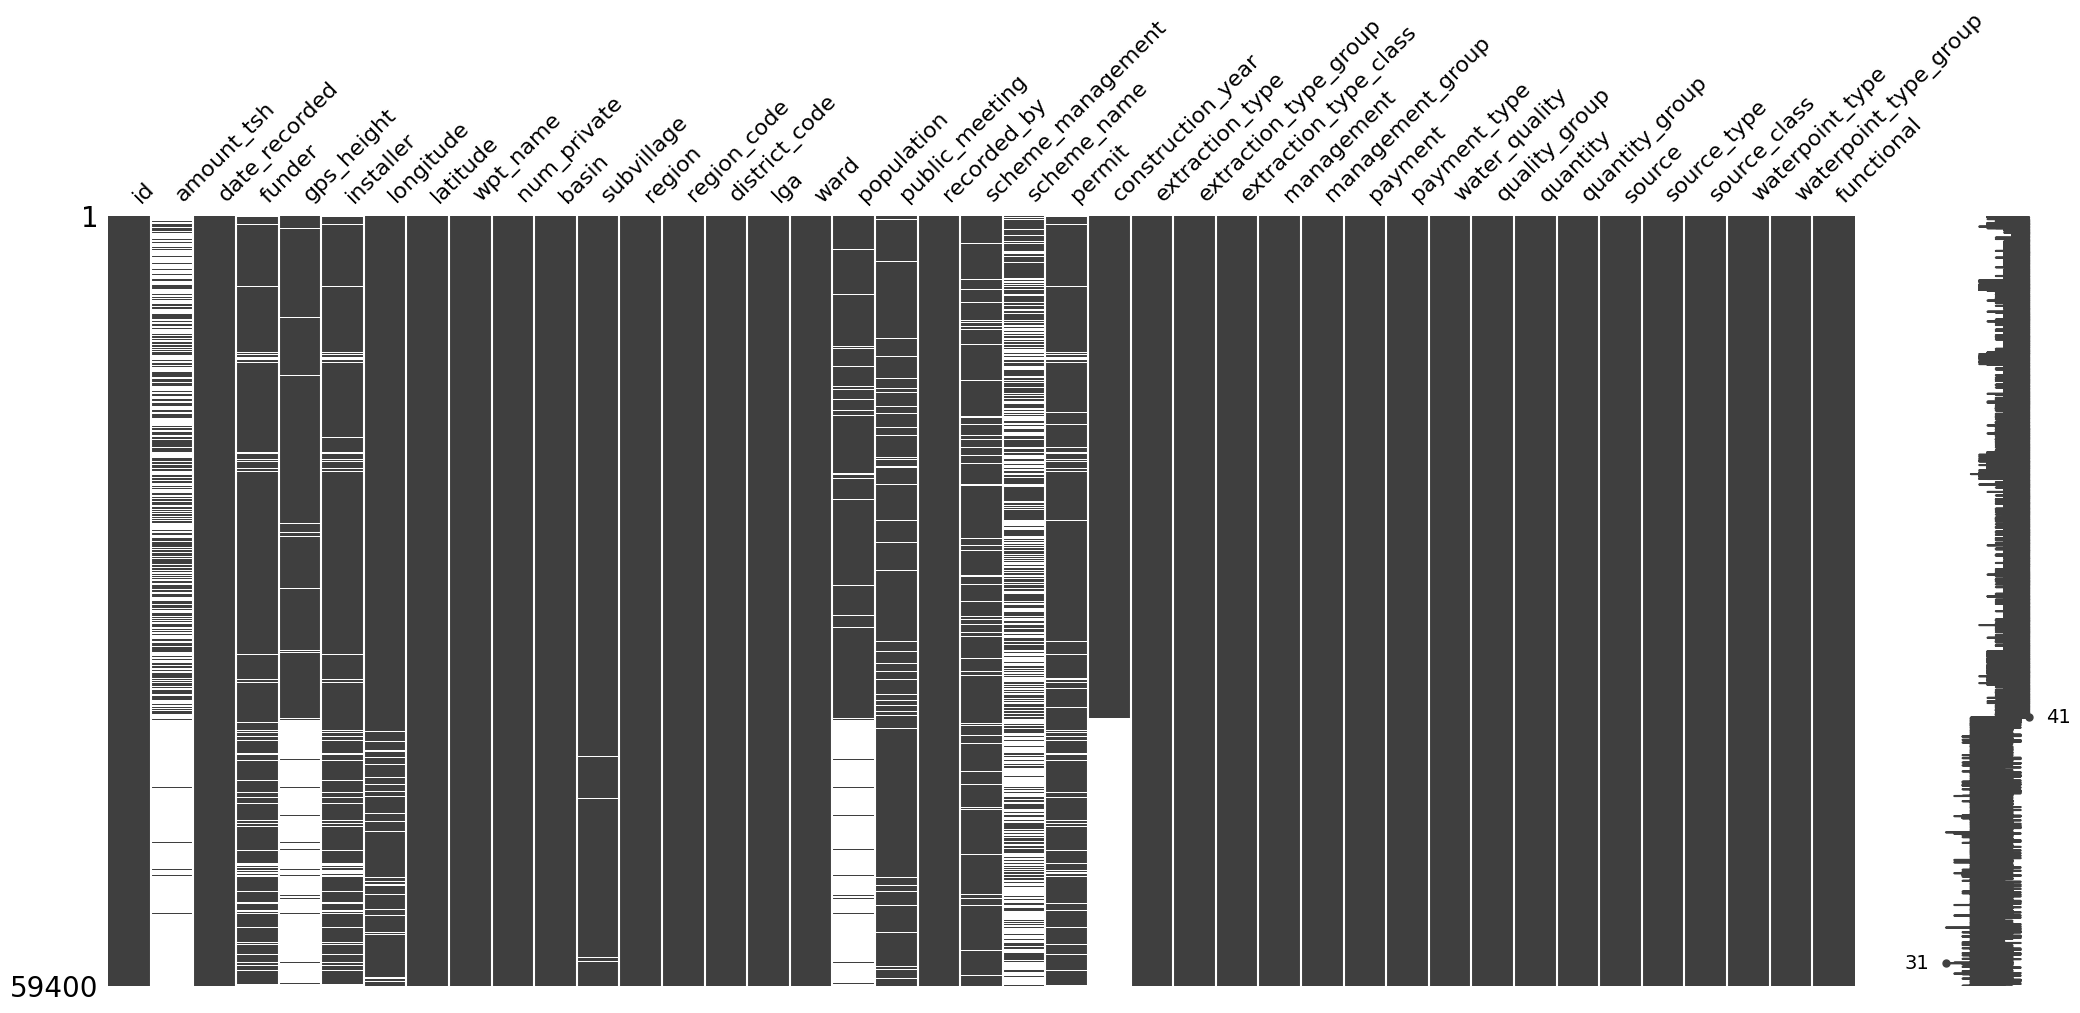

In [ ]:
sorted = df.sort_values('construction_year')
msno.matrix(sorted)

Strong correlation in missingness

<Axes: >

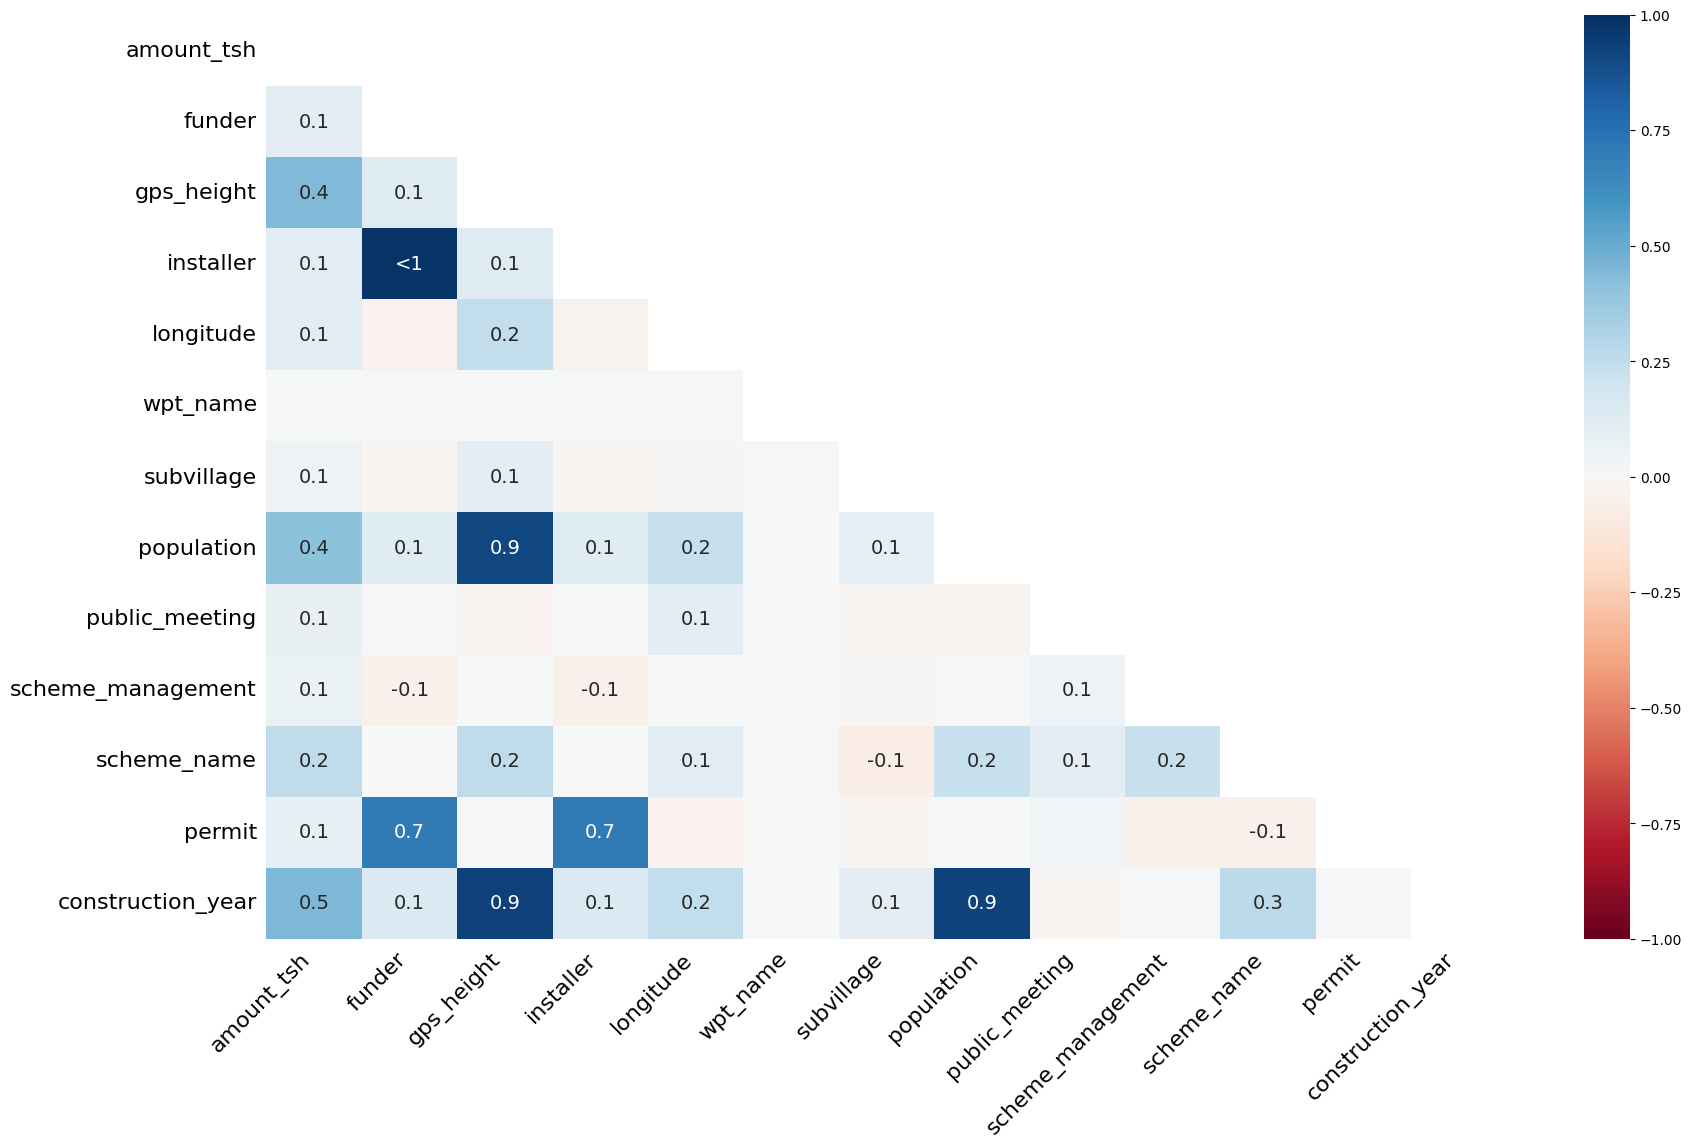

In [ ]:
msno.heatmap(df)

In [ ]:
df[df['gps_height'] < df['gps_height'].quantile(0.05)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,functional
34,41583,NaN,2011-02-23,NaN,-41.0,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
137,64062,30.0,2013-01-25,Lips,11.0,LIPS,39.888981,-10.133632,Bondeni 1,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
145,28669,50.0,2013-03-21,0,12.0,0,39.185710,-6.892593,Chekanao,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
148,53167,NaN,2013-01-24,Fini Water,1.0,Fini water,39.600234,-10.027721,Kwa Timba,0,...,salty,salty,enough,enough,machine dbh,borehole,groundwater,other,other,non functional
152,60983,NaN,2013-03-16,0,-15.0,0,39.527114,-6.988748,Msikitini,0,...,salty,salty,dry,dry,machine dbh,borehole,groundwater,other,other,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59243,3396,50.0,2013-03-16,0,-20.0,0,39.524021,-6.984802,Kwa Mariwala,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59251,65997,NaN,2013-01-24,Serikali,-37.0,Serikali,39.736299,-9.884813,Kwa Asha Mgugi,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe multiple,communal standpipe,functional
59351,55322,50.0,2013-03-18,0,-19.0,0,39.534599,-7.088183,Kwa China,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
59356,34109,50.0,2013-02-05,Tasaf,-18.0,TASAF,40.218467,-10.330780,Kwa Mzee Licholonjo,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


### Tsh Values (amount water available to waterpoint)

In [ ]:
#Proportion of rows with an amount of tsh_value = np.nan
number_of_zeros = df['amount_tsh'].isnull().sum().sum()
print(number_of_zeros / len(df.index) * 100)

70.09932659932659


70% of TSH values are missing. It could be a useful feature as it is essentially a representation of the power of a pump. Higher Power Pumps could indicate that it receives more maintenance as it is more "important", as shown below. The "mega pumps" > 120_000 are all functional.

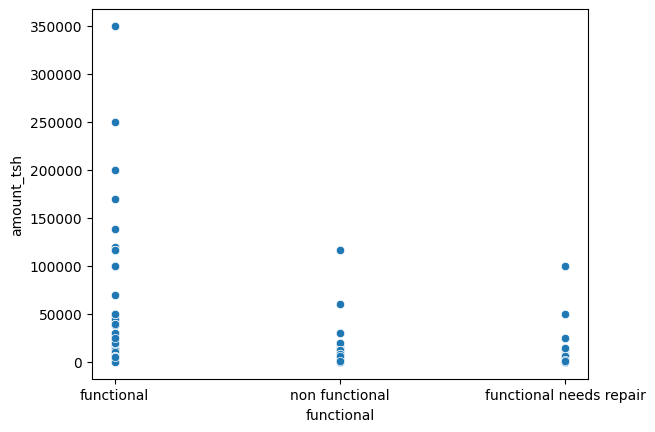

In [ ]:
sns.scatterplot(df, x='functional', y='amount_tsh')
plt.show()

However, seeing as the majority of the values are missing, for now we are going to remove it as imputation of such a scale would be risky and could confuse the model.

In [ ]:
log_imputation('amount_tsh', 'removal', final=True)
df.drop(columns=['amount_tsh'], inplace=True)

### Num Private 

The num_private value has no description, and most of the values are zero. So we decide to drop it

In [ ]:
df['num_private']

0        0
1        0
2        0
3        0
4        0
        ..
59395    0
59396    0
59397    0
59398    0
59399    0
Name: num_private, Length: 59400, dtype: int64

In [ ]:
df.drop(columns=['num_private'], inplace=True, axis=1)
log_imputation('num_private', "removal", final=True)

### Water Quality and Quality Group

Identified different spellings of "coloured" and "colored"

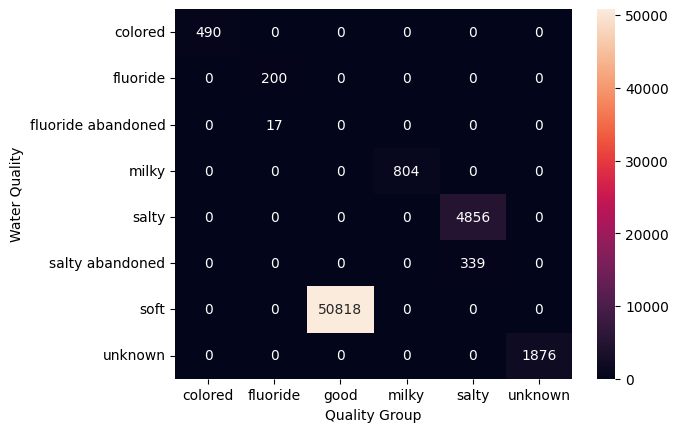

In [ ]:
df.replace(inplace=True, to_replace="coloured", value="colored")

contingency_table = pd.crosstab(df['water_quality'], df['quality_group'])
sns.heatmap(contingency_table, annot=True, fmt="d")
plt.xlabel('Quality Group')
plt.ylabel('Water Quality')
plt.show()

This shows that the water_quality and water_group columns are essentially identical, but it uses a choice of different words. It seems reasonable to drop one of these two columns. Therefore we could merge these two columns by keeping the Quality group and appending the idea of 'soft' water to 'good' water

In [ ]:
df['water_quality'].replace(to_replace='soft', value='soft (good)', inplace=True)
df.drop(axis=1, columns=['quality_group'], inplace=True)
log_imputation('quality_group', 'removal', True)

### Quantity and Quantity_Group

In [ ]:
df["quantity_columns_same"] = df["quantity"] == df["quantity_group"]
print((df['quantity_columns_same'] == True).sum())
print((df['quantity_columns_same'] == False).sum())

59400
0


We have shown that these two columns are identical, so it is safe to drop one of them, quantity_group is more descriptive so we are keeping the latter. Quantity is dropped.

In [ ]:
df.drop(columns=['quantity_columns_same'], inplace=True, axis=1)
df.drop(columns=['quantity'], inplace=True, axis=1)
log_imputation('quantity', 'removal', True)

### Waterpoint_type and Waterpoint_type_group

In [ ]:
df["waterpoint_type_same"] = df["waterpoint_type"] == df["waterpoint_type_group"]
print((df['waterpoint_type_same'] == True).sum())
print((df['waterpoint_type_same'] == False).sum())

53297
6103


In [ ]:
df[df["waterpoint_type_same"] == False]

,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,payment_type,water_quality,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,functional,waterpoint_type_same
2,34310,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329e+00,Kwa Mahundi,Pangani,Majengo,...,per bucket,soft (good),enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,False
3,67743,2013-01-28,Unicef,263.0,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,never pay,soft (good),dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,False
5,9944,2011-03-13,Mkinga Distric Coun,NaN,DWE,39.172796,-4.765587e+00,Tajiri,Pangani,Moa/Mwereme,...,per bucket,salty,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional,False
53,32376,2011-08-01,Government Of Tanzania,NaN,Government,NaN,-2.000000e-08,Polisi,Lake Victoria,Center,...,unknown,unknown,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,False
55,68724,2013-02-22,Muwsa,766.0,MUWSA,37.348169,-3.356538e+00,Environment,Pangani,Dhobi Street,...,per bucket,soft (good),insufficient,spring,spring,groundwater,communal standpipe multiple,communal standpipe,non functional,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59337,29915,2013-01-28,Isf,834.0,DWE,29.749577,-4.899134e+00,Shule Ya Msingi Muhamani,Lake Tanganyika,Kaskazini,...,unknown,soft (good),enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,non functional,False
59345,68576,2013-01-25,Isf,962.0,DWE,29.729909,-4.801508e+00,Tupendane,Lake Tanganyika,Kabanga,...,monthly,soft (good),enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,functional needs repair,False
59349,54026,2012-10-07,Dwsp,NaN,DWE,32.242568,-4.189353e+00,Kwa Mzee John Magube,Lake Tanganyika,Mbika A,...,per bucket,soft (good),enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,non functional,False
59356,34109,2013-02-05,Tasaf,-18.0,TASAF,40.218467,-1.033078e+01,Kwa Mzee Licholonjo,Ruvuma / Southern Coast,Mtawanya Sokoni,...,per bucket,soft (good),enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional,False


We have shown that waterpoint_type and waterpoint_type_group overlap, the only exception is certain waterpoint_type columns also have the suffix "multiple". Therefore it seems reasonsable to decide to remove the column "waterpoint_type_group" for now. Removing excessive columns helps prevent against overfitting as is better for performance and manageability of the data.

In [ ]:
df.drop(columns=['waterpoint_type_same', 'waterpoint_type_group'], inplace=True, axis=1)
log_imputation('waterpoint_type_group', 'removal', True)

### Payment and Payment_type

Payment and Payment Type might be similar, so we are checking their differences

In [ ]:
df["payment_same"] = df["payment"] == df["payment_type"]
print((df['payment_same'] == True).sum())
print((df['payment_same'] == False).sum())

34559
24841


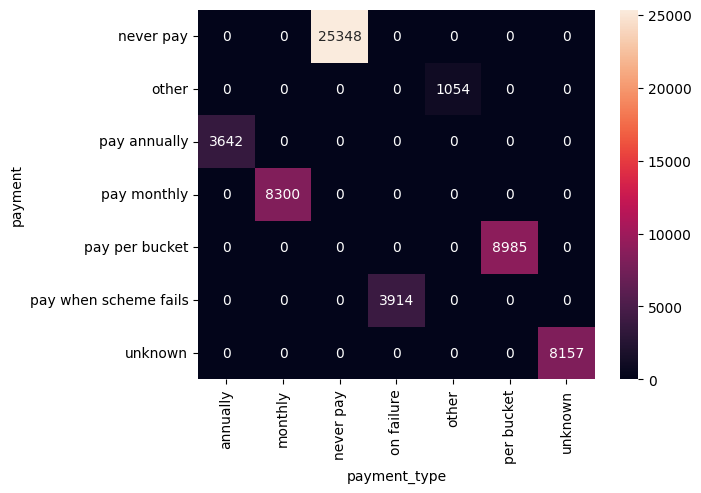

In [ ]:
contingency_table = pd.crosstab(df['payment'], df['payment_type'])
sns.heatmap(contingency_table, annot=True, fmt="d")
plt.show()

The Heatmap shows that these two columns are the same but with different wording, we are choosing to keep the payment_type as the wording is a bit more concise

In [ ]:
df[df["payment_same"] == False]

,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,payment,payment_type,water_quality,quantity_group,source,source_type,source_class,waterpoint_type,functional,payment_same
0,69572,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,pay annually,annually,soft (good),enough,spring,spring,groundwater,communal standpipe,functional,False
2,34310,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,pay per bucket,per bucket,soft (good),enough,dam,dam,surface,communal standpipe multiple,functional,False
5,9944,2011-03-13,Mkinga Distric Coun,NaN,DWE,39.172796,-4.765587,Tajiri,Pangani,Moa/Mwereme,...,pay per bucket,per bucket,salty,enough,other,other,unknown,communal standpipe multiple,functional,False
11,50409,2013-02-18,Danida,1062.0,DANIDA,35.770258,-10.574175,Kwa Alid Nchimbi,Lake Nyasa,Ngondombwito,...,pay when scheme fails,on failure,soft (good),insufficient,shallow well,shallow well,groundwater,hand pump,functional,False
13,50495,2013-03-15,Lawatefuka Water Supply,1368.0,Lawatefuka water sup,37.092574,-3.181783,Kwa John Izack Mmari,Pangani,Omarini,...,pay monthly,monthly,soft (good),enough,spring,spring,groundwater,communal standpipe,functional,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,11164,2011-03-09,World Bank,351.0,ML appro,37.634053,-6.124830,Chimeredya,Wami / Ruvu,Komstari,...,pay monthly,monthly,soft (good),enough,machine dbh,borehole,groundwater,communal standpipe,non functional,False
59395,60739,2013-05-03,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,...,pay per bucket,per bucket,soft (good),enough,spring,spring,groundwater,communal standpipe,functional,False
59396,27263,2011-05-07,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,...,pay annually,annually,soft (good),enough,river,river/lake,surface,communal standpipe,functional,False
59397,37057,2011-04-11,NaN,NaN,NaN,34.017087,-8.750434,Mashine,Rufiji,Madungulu,...,pay monthly,monthly,fluoride,enough,machine dbh,borehole,groundwater,hand pump,functional,False


In [ ]:
df.drop(columns=['payment_same'], inplace=True, axis=1)
df.drop(columns=['payment'], inplace=True, axis=1)
log_imputation('payment', 'removal', True)

### Funder, Installer and Permit

The funder column is a bit problematic as it has a few inconsistencies: 0s to repalces NaN, as well as "No" which we assumes means there is no funder to report. We will be imputing the installer at this stage as well, as it shows a high correlation in missing values.

We are also removing trailing spaces for good measure in case to minimise unique values

In [ ]:
print("Number of Unique Funders before: ", len(df['funder'].unique()))
df['funder'].replace(inplace=True, to_replace='0', value=np.nan) #Few Values of 0
df['funder'].replace(inplace=True, to_replace='No', value=np.nan) #Few values of 'no'
df['funder'] = df['funder'].str.strip() #Strip trailing spaces
print("Number of Unique Funders after: ", len(df['funder'].unique()))


Number of Unique Funders before:  1897
Number of Unique Funders after:  1895


As funder is a category, we will first try mode imputation

Percentage of null values funder:  0.07656565656565656
Percentage of null values installer:  0.061531986531986535
Percentage of null values permit:  0.05144781144781145
Mode:  Government Of Tanzania


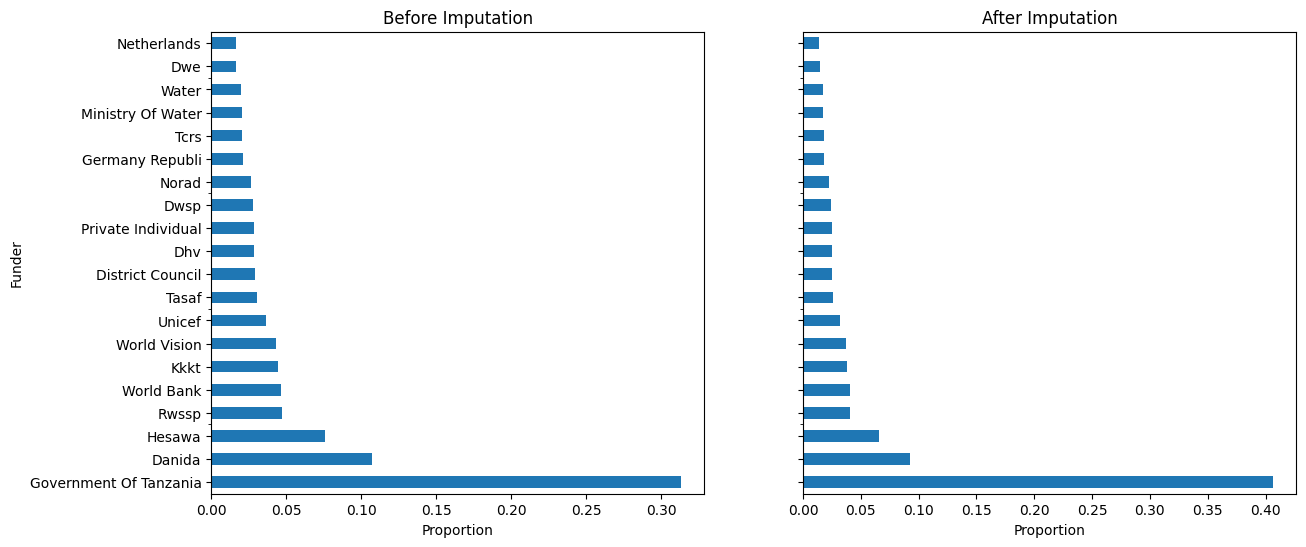

In [ ]:
df_mode_funder = df.copy()
og_df = df.copy()

print("Percentage of null values funder: ", df_mode_funder['funder'].isnull().mean())
print("Percentage of null values installer: ", df_mode_funder['installer'].isnull().mean())
print("Percentage of null values permit: ", df_mode_funder['permit'].isnull().mean())


mode_value = df_mode_funder['funder'].mode()[0]  
print("Mode: ", mode_value)

# Correct way to replace NaN values with the mode
df_mode_funder['funder'] = df_mode_funder['funder'].fillna(mode_value)

# Selecting top funders from the original dataset for comparison
top_funders = og_df['funder'].value_counts().nlargest(20).index

fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
og_df[og_df['funder'].isin(top_funders)]['funder'].value_counts(normalize=True).plot(kind='barh', ax=ax[0], title='Before Imputation')
df_mode_funder[df_mode_funder['funder'].isin(top_funders)]['funder'].value_counts(normalize=True).plot(kind='barh', ax=ax[1], title='After Imputation')

ax[0].set_xlabel('Proportion')
ax[0].set_ylabel('Funder')
ax[1].set_xlabel('Proportion')
plt.show()

Essentially, we are assuming that the 6% of missing funders are the Governemnt fo Tanzania, this doesn't feel very accurate and coud lead to issues. Therefore, we are going to be replacing missing values with a "missing" category; this will make the model create a missing category. This feels safer than simply making all the missing categories part of the "Government of Tanzania"

In [ ]:
df['funder'].replace(np.nan, 'missing', inplace=True)
df['installer'].replace(np.nan, 'missing', inplace=True)
df['permit'].replace(np.nan, 'missing', inplace=True)

log_imputation('funder', 'missing category', final=True)
log_imputation('installer', 'missing category', final=True)
log_imputation('permit', 'missing category', final=True)

### Scheme Management

Percentage of null values in scheme management: 6.53%


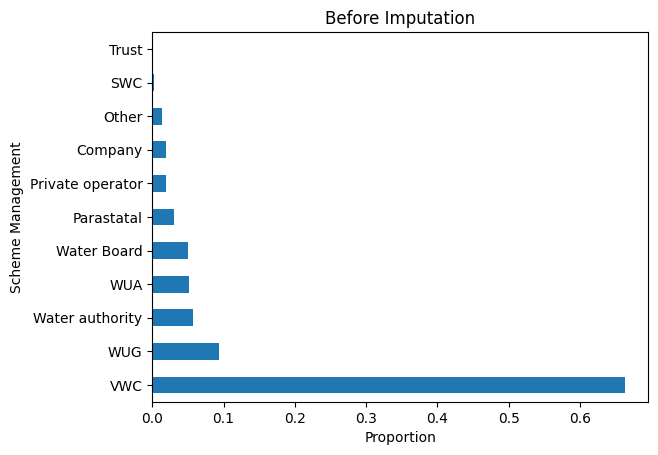

In [ ]:
df_scheme = df.copy()

null_percentage = df_scheme['scheme_management'].isnull().mean() * 100

print("Percentage of null values in scheme management: {:.2f}%".format(null_percentage))

# Finding the top 20 'scheme_management' categories
top_schemes = df_scheme['scheme_management'].value_counts().nlargest(20).index

# Creating a figure and axes for plotting
fig, ax = plt.subplots()

# Plotting the distribution of 'scheme_management' for the top categories
df_scheme[df_scheme['scheme_management'].isin(top_schemes)]['scheme_management'].value_counts(normalize=True).plot(kind='barh', title='Before Imputation', ax=ax)

ax.set_xlabel('Proportion')
ax.set_ylabel('Scheme Management')
plt.show()

As we can see, over 60% of the values of the values of scheme_management are 'VWC'; missing data analysis from earlier reveals that this column does not have any missingness correlation with any other column; it is safe to assume therefore that it is MAR. Therefore, we will choose to impute the value with the most column value: VWC

In [ ]:
mode_value = df_scheme['scheme_management'].mode()[0]  
print("Mode of Scheme Management: ", mode_value)

# Correct way to replace NaN values with the mode
df['scheme_management'] = df_mode_funder['scheme_management'].fillna(mode_value)

Mode of Scheme Management:  VWC


### Public Meeting

The public meeting column does not have any correlation with any other column. It is difficult to impute as it is a binary column which seems to have a specific meeting, and so we are going to make the decision of removing this column

In [ ]:
df.drop(columns=['public_meeting'], inplace=True)
log_imputation('public_meeting', 'removal', final=True)

### Scheme Name

In [ ]:
print("Empty scheme names: ", (df['scheme_name'].isnull()).sum())
print("One letter scheme names: ", df[df['scheme_name'].str.len() == 1].shape[0])


Empty scheme names:  28810
One letter scheme names:  2119


Looking through the column, we can see that almost half of all values are empty, and many values seem to be incomplete or inconsistent. Therefore, we are going to drop this column

In [ ]:
df.drop(columns=['scheme_name'], inplace=True)
log_imputation('scheme_name', "removal", final=True)

## Location (Gps_height, Longitude, Latitude)

In [ ]:



print("Longitude: ", (df['longitude'].isnull()).sum())
print("Latitude: ", (df['latitude'].isnull()).sum()) 
print((df['gps_height'].isnull()).sum())

Longitude:  1812
Latitude:  0
20438


Looking at the latitude and longitude

Latitude Null values are shown as `-2e-8` so we are replacing them by np.nan

In [ ]:
df[df['longitude'].isnull()] 

,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,management,management_group,payment_type,water_quality,quantity_group,source,source_type,source_class,waterpoint_type,functional
21,6091,2013-02-10,Dwsp,NaN,DWE,NaN,-2.000000e-08,Muungano,Lake Victoria,Ibabachegu,...,wug,user-group,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,functional
53,32376,2011-08-01,Government Of Tanzania,NaN,Government,NaN,-2.000000e-08,Polisi,Lake Victoria,Center,...,vwc,user-group,unknown,unknown,dry,machine dbh,borehole,groundwater,communal standpipe multiple,non functional
168,72678,2013-01-30,Wvt,NaN,WVT,NaN,-2.000000e-08,Wvt Tanzania,Lake Victoria,Ilula,...,parastatal,parastatal,other,soft (good),seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional
177,56725,2013-01-17,Netherlands,NaN,DWE,NaN,-2.000000e-08,Kikundi Cha Wakina Mama,Lake Victoria,Mahaha,...,wug,user-group,unknown,soft (good),enough,shallow well,shallow well,groundwater,other,non functional
253,13042,2012-10-29,Hesawa,NaN,DWE,NaN,-2.000000e-08,Kwakisusi,Lake Victoria,Nyamatala,...,vwc,user-group,never pay,soft (good),insufficient,shallow well,shallow well,groundwater,hand pump,functional needs repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,2011-07-18,Dwsp,NaN,DWE,NaN,-2.000000e-08,Wazazo,Lake Victoria,Mwamabuli,...,wug,user-group,other,soft (good),enough,shallow well,shallow well,groundwater,hand pump,functional needs repair
59208,3631,2013-01-22,Dwsp,NaN,DWE,NaN,-2.000000e-08,Mtakuja,Lake Victoria,Mbiti,...,wug,user-group,unknown,soft (good),enough,shallow well,shallow well,groundwater,hand pump,functional
59295,60843,2011-07-19,Rwssp,NaN,DWE,NaN,-2.000000e-08,Maendeleo,Lake Victoria,Mwamalizi,...,wug,user-group,never pay,soft (good),enough,shallow well,shallow well,groundwater,hand pump,functional needs repair
59324,748,2013-01-22,World Vision,NaN,World Vision,NaN,-2.000000e-08,Mwazwilo,Lake Victoria,Mbita,...,wug,user-group,unknown,soft (good),enough,shallow well,shallow well,groundwater,hand pump,functional


In [ ]:
df['latitude'].replace(-2e-8, np.nan, inplace=True)

In [ ]:


og_df = df.copy() #Create a fixed copy of dataframe to comapre to
loc_df = df.copy() #Creating a copy of dataframe to impute

In [ ]:
print("Longitude: ", (df['longitude'].isnull()).sum())
print("Latitude: ", (df['latitude'].isnull()).sum()) 
print((df['gps_height'].isnull()).sum())

Longitude:  1812
Latitude:  1812
20438


Many of the water (1/3) pump have a GPS_height of 0. We could use a Maps API to estimate the gps_height based on the longitude and latitude of the water pump such as https://www.dcode.fr/earth-elevation

However, this would be expensive as there are a huge amount of values. Therefore, we are going to calculate the mean gps_height of similary located water pumps of the same: subvillage, region, lga, ward. Inspired by: "Hwang, Sungsoon & Webber-Ritchey, Kashica & Moxley, Elizabeth. (2022). Comparison of GPS imputation methods in environmental health research. Geospatial Health. 17. 10.4081/gh.2022.1081. "

In [ ]:
mean_gps_height = loc_df.groupby(['subvillage', 'region', 'lga', 'ward'])['gps_height'].mean().reset_index(name='mean_gps_height')
mean_longitude = loc_df.groupby([ 'subvillage', 'region', 'lga', 'ward'])['longitude'].mean().reset_index(name='mean_longitude')
mean_latitude = loc_df.groupby(['subvillage', 'region', 'lga', 'ward'])['latitude'].mean().reset_index(name='mean_latitude')


loc_df = loc_df.merge(mean_gps_height, on=['subvillage', 'region', 'lga', 'ward'], how='left')
loc_df = loc_df.merge(mean_longitude, on=['subvillage', 'region', 'lga', 'ward'], how='left')
loc_df = loc_df.merge(mean_latitude, on=['subvillage', 'region', 'lga', 'ward'], how='left')

loc_df.loc[loc_df['gps_height'].isnull(), 'gps_height'] = loc_df['mean_gps_height']
loc_df.loc[df['longitude'].isnull(), 'longitude'] = loc_df['mean_longitude']
loc_df.loc[df['latitude'].isnull(), 'latitude'] = loc_df['mean_latitude']

loc_df.drop(columns=['mean_gps_height', 'mean_longitude', 'mean_latitude'], inplace=True)

Longitude:  1796
Latitude:  1796
20382


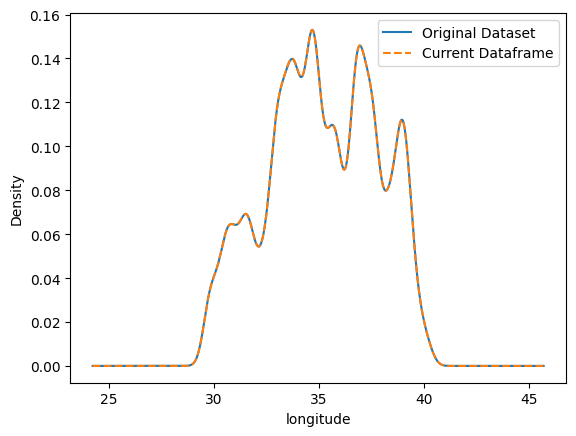

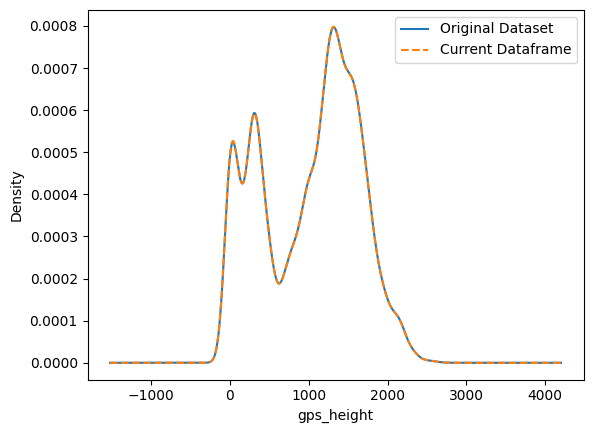

In [ ]:
print("Longitude: ", (loc_df['longitude'].isnull()).sum())
print("Latitude: ", (loc_df['latitude'].isnull()).sum()) 
print((loc_df['gps_height'].isnull()).sum())
check_impute_difference('longitude', og_df, loc_df)
check_impute_difference('gps_height', og_df, loc_df)

So far, this has not been very useful as it has only imputed about 100 values of heights, and about 20 on longitude and latitude. Therefore, we will try doing a less granular approach for this imputation, but following the same idea: subvillage < ward < lga < region

### Ward

Longitude:  1621
Latitude:  1621
20226


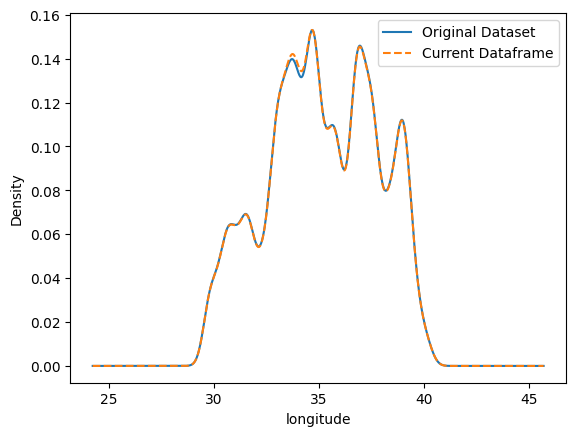

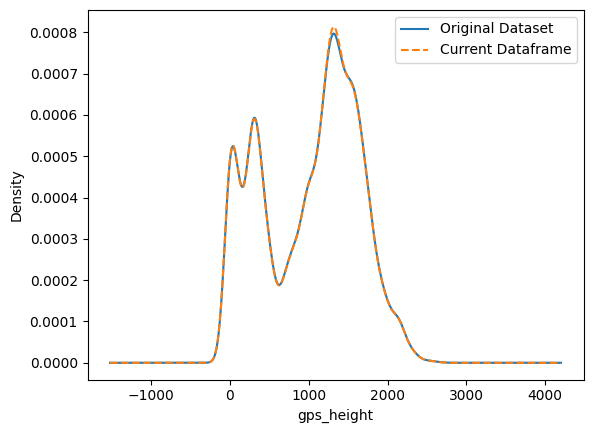

In [ ]:
mean_gps_height = loc_df.groupby(['region', 'lga', 'ward'])['gps_height'].mean().reset_index(name='mean_gps_height')
mean_longitude = loc_df.groupby(['region', 'lga', 'ward'])['longitude'].mean().reset_index(name='mean_longitude')
mean_latitude = loc_df.groupby(['region', 'lga', 'ward'])['latitude'].mean().reset_index(name='mean_latitude')


loc_df = loc_df.merge(mean_gps_height, on=['region', 'lga', 'ward'], how='left')
loc_df = loc_df.merge(mean_longitude, on=['region', 'lga', 'ward'], how='left')
loc_df = loc_df.merge(mean_latitude, on=['region', 'lga', 'ward'], how='left')

loc_df.loc[df['gps_height'].isnull(), 'gps_height'] = loc_df['mean_gps_height']
loc_df.loc[df['longitude'].isnull(), 'longitude'] = loc_df['mean_longitude']
loc_df.loc[df['latitude'].isnull(), 'latitude'] = loc_df['mean_latitude']

loc_df.drop(columns=['mean_gps_height', 'mean_longitude', 'mean_latitude'], inplace=True)
print("Longitude: ", (loc_df['longitude'].isnull()).sum())
print("Latitude: ", (loc_df['latitude'].isnull()).sum()) 
print((loc_df['gps_height'].isnull()).sum())
check_impute_difference('longitude', og_df, loc_df)
check_impute_difference('gps_height', og_df, loc_df)

### Local Government Area

Longitude:  488
Latitude:  488
18988


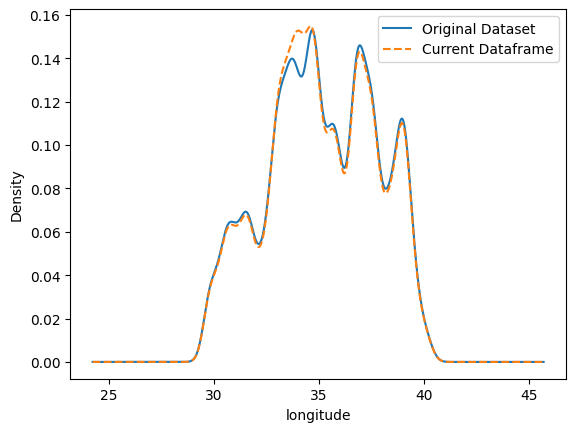

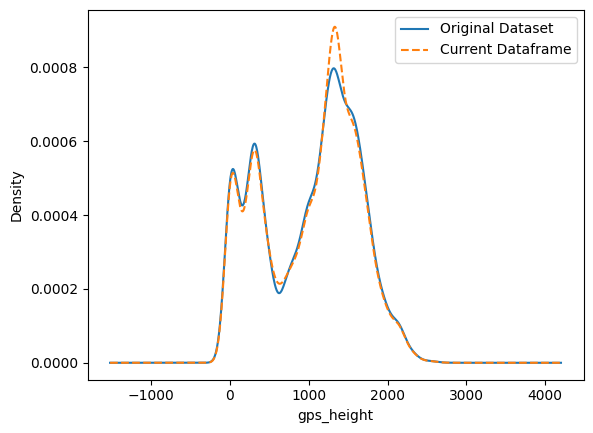

In [ ]:
mean_gps_height = loc_df.groupby(['region', 'lga'])['gps_height'].mean().reset_index(name='mean_gps_height')
mean_longitude = loc_df.groupby(['region', 'lga'])['longitude'].mean().reset_index(name='mean_longitude')
mean_latitude = loc_df.groupby(['region', 'lga'])['latitude'].mean().reset_index(name='mean_latitude')


loc_df = loc_df.merge(mean_gps_height, on=['region', 'lga'], how='left')
loc_df = loc_df.merge(mean_longitude, on=['region', 'lga'], how='left')
loc_df = loc_df.merge(mean_latitude, on=['region', 'lga'], how='left')

loc_df.loc[df['gps_height'].isnull(), 'gps_height'] = loc_df['mean_gps_height']
loc_df.loc[df['longitude'].isnull(), 'longitude'] = loc_df['mean_longitude']
loc_df.loc[df['latitude'].isnull(), 'latitude'] = loc_df['mean_latitude']

loc_df.drop(columns=['mean_gps_height', 'mean_longitude', 'mean_latitude'], inplace=True)
print("Longitude: ", (loc_df['longitude'].isnull()).sum())
print("Latitude: ", (loc_df['latitude'].isnull()).sum()) 
print((loc_df['gps_height'].isnull()).sum())
check_impute_difference('longitude', og_df, loc_df)
check_impute_difference('gps_height', og_df, loc_df)

### Region

Longitude:  488
Latitude:  488
18988


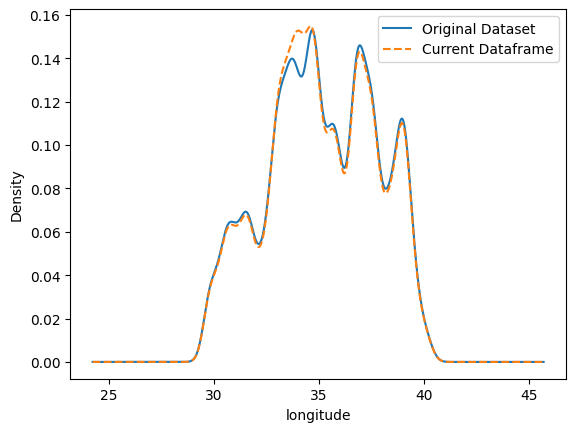

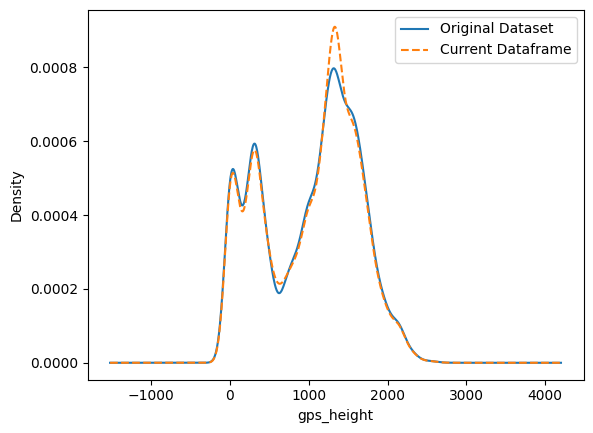

In [ ]:
mean_gps_height = loc_df.groupby(['region'])['gps_height'].mean().reset_index(name='mean_gps_height')
mean_longitude = loc_df.groupby(['region'])['longitude'].mean().reset_index(name='mean_longitude')
mean_latitude = loc_df.groupby(['region'])['latitude'].mean().reset_index(name='mean_latitude')


loc_df = loc_df.merge(mean_gps_height, on=['region'], how='left')
loc_df = loc_df.merge(mean_longitude, on=['region'], how='left')
loc_df = loc_df.merge(mean_latitude, on=['region'], how='left')

df.loc[df['gps_height'].isnull(), 'gps_height'] = loc_df['mean_gps_height']
df.loc[df['longitude'].isnull(), 'longitude'] = loc_df['mean_longitude']
df.loc[df['latitude'].isnull(), 'latitude'] = loc_df['mean_latitude']

loc_df.drop(columns=['mean_gps_height', 'mean_longitude', 'mean_latitude'], inplace=True)
print("Longitude: ", (loc_df['longitude'].isnull()).sum())
print("Latitude: ", (loc_df['latitude'].isnull()).sum()) 
print((loc_df['gps_height'].isnull()).sum())
check_impute_difference('longitude', og_df, loc_df)
check_impute_difference('gps_height', og_df, loc_df)

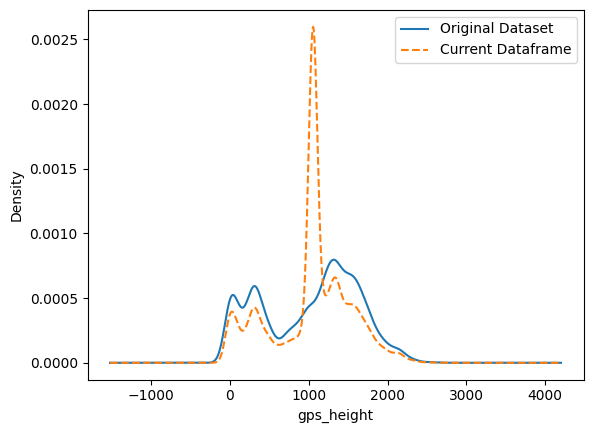

In [ ]:
mean_gps_height = df['gps_height'].mean()

loc_df.loc[loc_df['gps_height'].isnull(), 'gps_height'] = mean_gps_height

check_impute_difference('gps_height', og_df, loc_df)
log_imputation('gps_height', 'mean', final=False)
log_imputation('longitude', 'mean', final=False)
log_imputation('latitude', 'mean', final=False)

We have successfully imputed all values of longitude and latitude missing values. However, this last step of replacing all remaining values has completely changed the distribution of the data, which is not very optimal.

Another common technique of imputation is using Multiple Imputation by Chained Equations (MICE). Essentially, it imputes the data by going through a series of prediction regression models, creating several imputed datasets and combining the optimal output. (source)

 We will be using miceforest

In [ ]:
import miceforest as mf

df_loc_mice = original_df.copy()
#Dropping unique valued columns and 
df_loc_mice = df_loc_mice.drop(['funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 'date_recorded', 'district_code'],axis=1)

for col in df_loc_mice.columns:
    if df_loc_mice[col].dtype == 'object':  # 'object' often means string text
        df_loc_mice[col] = df_loc_mice[col].astype('category')

kds = mf.ImputationKernel(
data = df_loc_mice,
save_all_iterations = True,
random_state = 42
)

kds.mice(2)
df_mice = kds.complete_data()

/root/venv/lib/python3.11/site-packages/miceforest/ImputationKernel.py:370: UserWarning: [scheme_management,scheme_name,extraction_type,extraction_type_group,extraction_type_class,management,water_quality,source,waterpoint_type,waterpoint_type_group] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


KernelInterrupted: Execution interrupted by the Jupyter kernel.

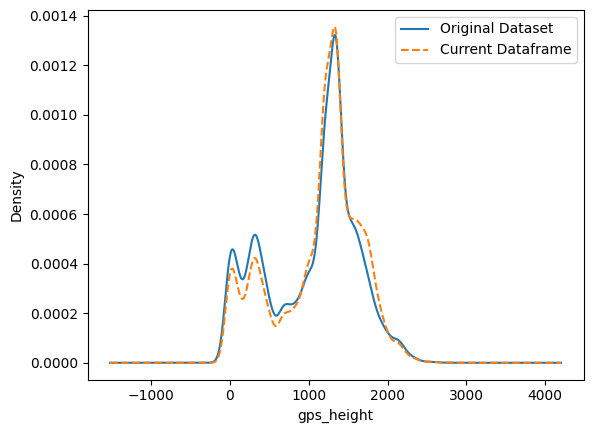

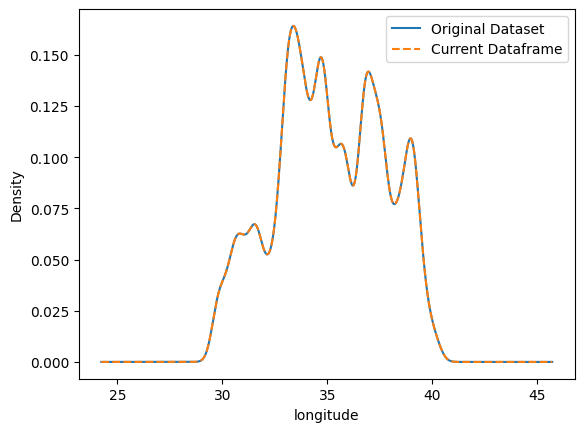

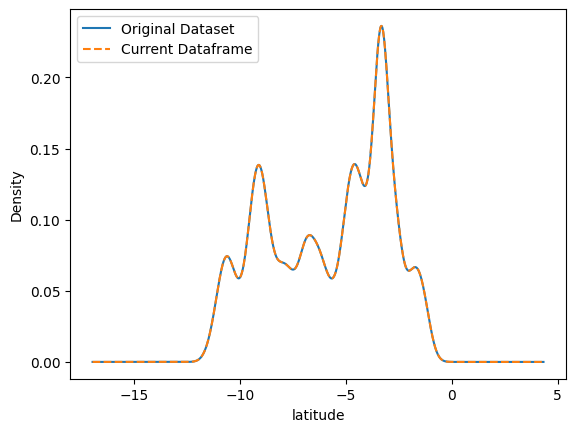

In [ ]:
check_impute_difference('gps_height', df, df_mice)
check_impute_difference('longitude', df, df_mice)
check_impute_difference('latitude', df, df_mice)

This imputation technique has brought about better results than Mean imputation, therefore, we will choose to use the MICE imputation.

In [ ]:

log_imputation('gps_height', 'mice', final=True)
log_imputation('longitude', 'mice', final=True)
log_imputation('latitude', 'mice', final=True)


df['gps_height'] = df_mice['gps_height']
df['longitude'] = df_mice['longitude']
df['latitude'] = df_mice['latitude']


<hr>

### Population

Due to the nature of the Population column, the same imputation techniques that we used on the location could be trialed; it is a integer and has a high importance to do the dataset. We are going to assume that a population value of zero is null, because a water pump would usually be installed in an area with a population.

In [ ]:
print("Number of null Populations: ", df['population'].isnull().sum())

Number of null Populations:  21381


In [ ]:
og_df = df.copy() #Useful state copy of dataframe currently
pop_df = df.copy() #Copy of dataframe to play around with


Logically, it would make sense that populations would be similar or identical in similar areas, therefore we are going to get the mean of the missing population values based on Geographical Locations as we did above for GPS information

In [ ]:
#Subvillage
mean_population = pop_df.groupby(['subvillage', 'region', 'lga', 'ward'])['population'].mean().reset_index(name='mean_population')
pop_df = pop_df.merge(mean_population, on=['subvillage', 'region', 'lga', 'ward'], how='left')
pop_df.loc[pop_df['population'].isnull(), 'population'] = pop_df['mean_population']
pop_df.drop(columns=['mean_population'], inplace=True)

#ward
mean_population = pop_df.groupby(['region', 'lga', 'ward'])['gps_height'].mean().reset_index(name='mean_population')
pop_df = pop_df.merge(mean_population, on=['region', 'lga', 'ward'], how='left')
pop_df.loc[pop_df['population'].isnull(), 'population'] = pop_df['mean_population']
pop_df.drop(columns=['mean_population'], inplace=True)


#lga
mean_population = pop_df.groupby(['region', 'lga'])['gps_height'].mean().reset_index(name='mean_population')
pop_df = pop_df.merge(mean_population, on=['region', 'lga'], how='left')
pop_df.loc[pop_df['population'].isnull(), 'population'] = pop_df['mean_population']
pop_df.drop(columns=['mean_population'], inplace=True)

#region
mean_population = pop_df.groupby(['region'])['gps_height'].mean().reset_index(name='mean_population')
pop_df = pop_df.merge(mean_population, on=['region'], how='left')
pop_df.loc[pop_df['population'].isnull(), 'population'] = pop_df['mean_population']
pop_df.drop(columns=['mean_population'], inplace=True)

log_imputation('population', 'mean', final=False)


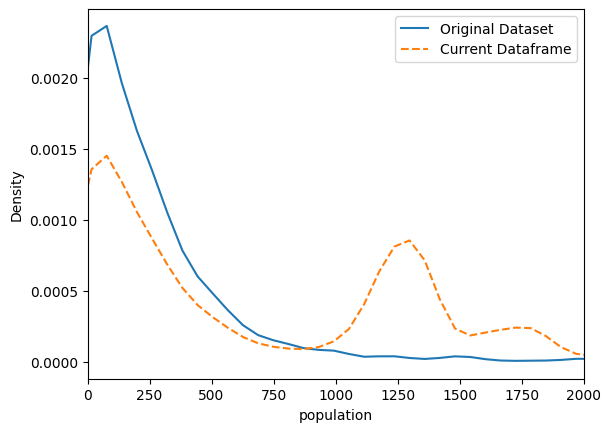

In [ ]:
og_df['population'].plot(kind='kde', )
pop_df['population'].plot(kind='kde', style = "--")
labels = ['Original Dataset', 'Current Dataframe']
plt.legend(labels)
plt.xlabel('population')
plt.xlim(0, 2000)
plt.show()

This is not very convincing as the two datasets now have a very different distribution. We are now going to use the MICE as we did for the location

In [ ]:

df_pop_mice = df_mice



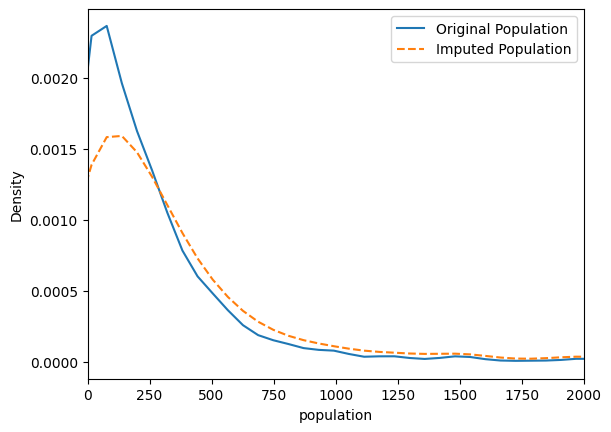

In [ ]:
df['population'].plot(kind='kde', )
df_pop_mice['population'].plot(kind='kde', style = "--")
labels = ['Original Population', 'Imputed Population']
plt.legend(labels)
plt.xlabel('population')
plt.xlim(0, 2000)
plt.show()

df['population'] = df_pop_mice['population']
log_imputation('population', 'mice', final=True)


This is a lot more consistent with the original dataset, therefore we are going to choose the MICE Imputation once again.

### Construction Year

In [ ]:
print("Number of null Construction Years: ", df['construction_year'].isnull().sum())


Number of null Construction Years:  20709


Intuitively something like getting a mean of the construction year for such a high number of missing values does not seem very safe, therefore we are going to perform a MICE imputation once again from earlier

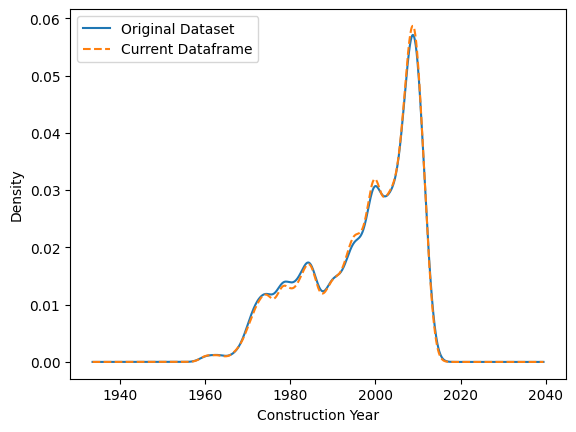

In [ ]:

df_year_mice = df_mice
df['construction_year'].plot(kind='kde', )
df_year_mice['construction_year'].plot(kind='kde', style = "--")
labels = ['Original Dataset', 'Current Dataframe']
plt.legend(labels)
plt.xlabel('Construction Year')
plt.show()

In [ ]:
df['construction_year'] = df_year_mice['construction_year']
log_imputation('construction_year', 'mice', final=True)


<hr>

### Checkpoint 1

Now, we make copy of the data at our first checkpoint, before we alter with data imputation.

### Data Cleaning / Imputing Progress

In [ ]:
#Check on imputation Progress

coursework_progress

,Column Names,Taken Care Of,Imputation Techniques Tried,Imputation Technique Used
0,id,False,[],None
1,amount_tsh,True,[removal],removal
2,date_recorded,False,[],None
3,funder,True,[missing category],missing category
4,gps_height,True,"[mean, mice]",mice
5,installer,True,[missing category],missing category
6,longitude,True,"[mean, mice]",mice
7,latitude,True,"[mean, mice]",mice
8,wpt_name,False,[],None
9,num_private,True,[removal],removal


In [ ]:
missing = round((df.isna().sum())/len(df)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)

public_meeting    5.6
subvillage        0.6
date_recorded     0.0
id                0.0
installer         0.0
funder            0.0
longitude         0.0
latitude          0.0
wpt_name          0.0
gps_height        0.0
basin             0.0
region            0.0
district_code     0.0
region_code       0.0
lga               0.0
dtype: float64

In [ ]:
df

,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,management,management_group,payment_type,water_quality,quantity_group,source,source_type,source_class,waterpoint_type,functional
0,69572,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,vwc,user-group,annually,soft (good),enough,spring,spring,groundwater,communal standpipe,functional
1,8776,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,...,wug,user-group,never pay,soft (good),insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional
2,34310,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,vwc,user-group,per bucket,soft (good),enough,dam,dam,surface,communal standpipe multiple,functional
3,67743,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,vwc,user-group,never pay,soft (good),dry,machine dbh,borehole,groundwater,communal standpipe multiple,non functional
4,19728,2011-07-13,Action In A,1180.0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,other,other,never pay,soft (good),seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,2013-05-03,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,...,water board,user-group,per bucket,soft (good),enough,spring,spring,groundwater,communal standpipe,functional
59396,27263,2011-05-07,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,...,vwc,user-group,annually,soft (good),enough,river,river/lake,surface,communal standpipe,functional
59397,37057,2011-04-11,missing,1928.0,missing,34.017087,-8.750434,Mashine,Rufiji,Madungulu,...,vwc,user-group,monthly,fluoride,enough,machine dbh,borehole,groundwater,hand pump,functional
59398,31282,2011-03-08,Malec,955.0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,...,vwc,user-group,never pay,soft (good),insufficient,shallow well,shallow well,groundwater,hand pump,functional


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aa0cdc8d-bec1-43a1-9a51-9c5b6130c78f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>